In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("data_1.csv")
df

,id,color,mass,diameter_1,diameter_2,diameter_3
0,1,1,5.760,1.65,1.62,1.66
1,2,1,5.580,1.61,1.62,1.62
2,3,1,5.353,1.60,1.62,1.62
3,4,1,5.629,1.63,1.66,1.65
4,5,1,5.170,1.61,1.58,1.61
5,6,1,5.746,1.64,1.68,1.63
6,7,1,5.127,1.58,1.60,1.59
7,8,1,4.992,1.57,1.55,1.57
8,9,1,5.705,1.65,1.64,1.62
9,10,1,5.578,1.59,1.62,1.60


Основные гистограммы для щарика с цветом 1



/var/folders/5b/gyqlymv970j5g0qxr4dlss0c0000gn/T/ipykernel_86660/1047562388.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df[df["color"] == 1].hist(ax=ax)


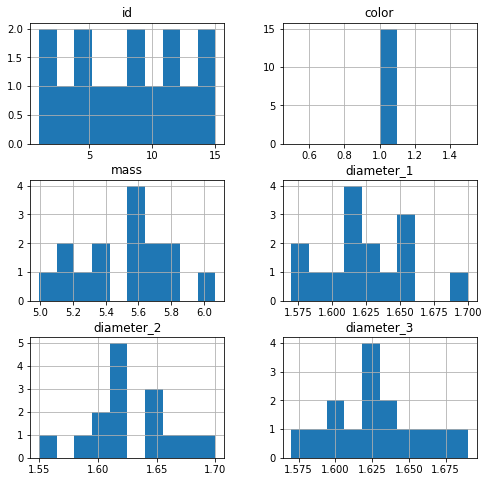

In [7]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()
df[df["color"] == 1].hist(ax=ax)
plt.show()

/var/folders/5b/gyqlymv970j5g0qxr4dlss0c0000gn/T/ipykernel_86660/3625672461.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df[df["color"] == 2].hist(ax=ax)


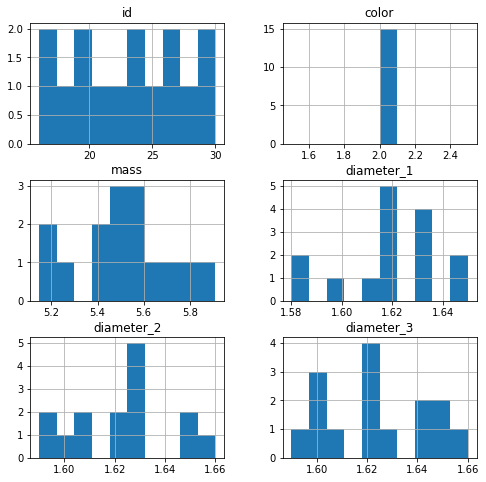

In [8]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()
df[df["color"] == 2].hist(ax=ax)
plt.show()

/var/folders/5b/gyqlymv970j5g0qxr4dlss0c0000gn/T/ipykernel_86660/2074819771.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df[df["color"] == 3].hist(ax=ax)


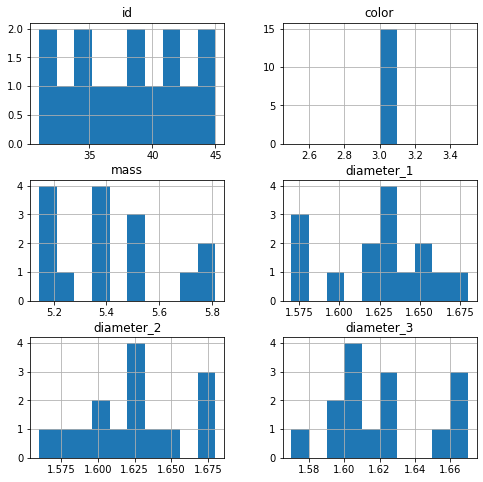

In [9]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()
df[df["color"] == 3].hist(ax=ax)
plt.show()

/var/folders/5b/gyqlymv970j5g0qxr4dlss0c0000gn/T/ipykernel_86660/1343837282.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df[df["color"] == 4].hist(ax=ax)


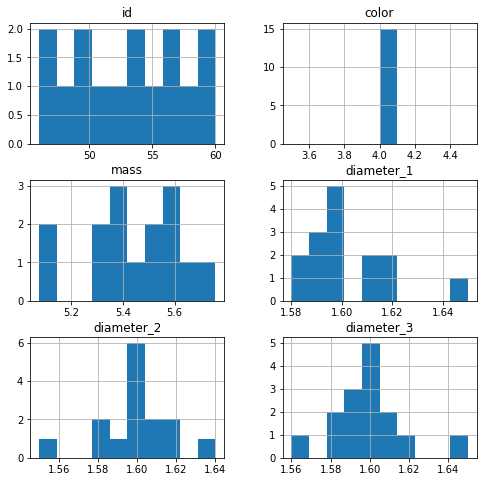

In [10]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()
df[df["color"] == 4].hist(ax=ax)
plt.show()

/var/folders/5b/gyqlymv970j5g0qxr4dlss0c0000gn/T/ipykernel_86660/3074575820.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax)


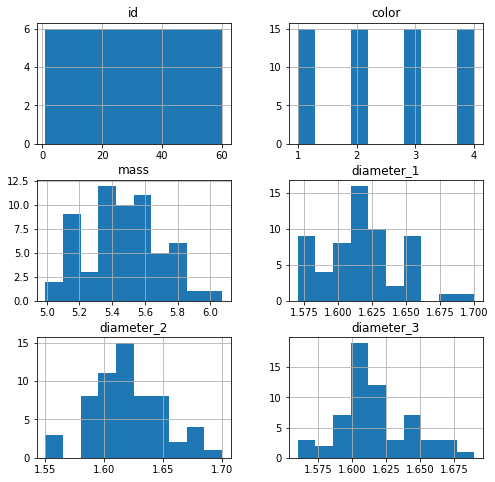

In [11]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()
df.hist(ax=ax)
plt.show()